In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [21]:
file_path = "asset_data.csv"
df = pd.read_csv(file_path).ffill().dropna(axis = 1)
np.shape(df) # (10,6)
print(df.head())

         Date  AssetA_Price  AssetA_Volume  AssetB_Price  AssetB_Volume  \
0  2024-01-02         101.2         120000          88.5          95000   
1  2024-01-03         102.0         118500          89.1          97000   
2  2024-01-04         100.5         150200          87.8         110000   
3  2024-01-05          99.8         160000          88.3         108500   
4  2024-01-08         100.7         140000          89.0         112000   

   Rate_USDGBP  
0        1.267  
1        1.264  
2        1.269  
3        1.271  
4        1.266  


Data appears to be clean, however ffill the possibility of missing data, and dropna for cleanliness.
Additionally, shape was checked for awareness (10, 6)

In [ ]:
assets = ['A, B']
df['AssetA_Returns'] = ((df['AssetA_Price'] / df['AssetA_Price'].shift(1)) - 1).fillna(0.0)
df['AssetB_Returns'] = ((df['AssetB_Price'] / df['AssetB_Price'].shift(1)) - 1).fillna(0.0)
df

,Date,AssetA_Price,AssetA_Volume,AssetB_Price,AssetB_Volume,Rate_USDGBP,AssetA_Returns,AssetB_Returns
0,2024-01-02,101.2,120000,88.5,95000,1.267,0.000000,0.000000
1,2024-01-03,102.0,118500,89.1,97000,1.264,0.007905,0.006780
2,2024-01-04,100.5,150200,87.8,110000,1.269,-0.014706,-0.014590
3,2024-01-05,99.8,160000,88.3,108500,1.271,-0.006965,0.005695
4,2024-01-08,100.7,140000,89.0,112000,1.266,0.009018,0.007928
5,2024-01-09,101.4,132500,89.7,115500,1.260,0.006951,0.007865
6,2024-01-10,103.0,145000,90.2,117000,1.258,0.015779,0.005574
7,2024-01-11,102.6,142000,91.1,116000,1.261,-0.003883,0.009978
8,2024-01-12,103.8,138500,92.3,114000,1.259,0.011696,0.013172
9,2024-01-15,104.2,136000,93.0,118000,1.256,0.003854,0.007584


From observation, AssetA has a higher likelihood of producing a negative return.

-ive returns on 2024-01-04 appear to be systematic, but AssetA struggled to bounce back in the day following.

Assets from observation appear to skew positive in correlation, but need to test of conclude further.

In [ ]:
mu_AssetA = df['AssetA_Returns'].mean()
mu_AssetB = df['AssetB_Returns'].mean()

sigma_AssetA = df['AssetA_Returns'].std()
sigma_AssetB = df['AssetB_Returns'].std()

cum_ret_AssetA = df['AssetA_Returns'].cumsum()
cum_ret_AssetB = df['AssetB_Returns'].cumsum()

(min_AssetA, max_AssetA) = (df['AssetA_Returns'].min(), df['AssetA_Returns'].max())
(min_AssetB, max_AssetB) = (df['AssetB_Returns'].min(), df['AssetB_Returns'].max())


# --- To Know
cum_ret_list_AssetA = df['AssetA_Returns'].cumsum().tolist()
cum_ret_list_AssetB = df['AssetB_Returns'].cumsum().tolist()

# --- descriptive stats table

mu = {'AssetA': mu_AssetA,
'AssetB': mu_AssetB}

sigma = {'AssetA': sigma_AssetA,
'AssetB': sigma_AssetB}

cum_ret = {'AssetA': cum_ret_AssetA,
'AssetB': cum_ret_AssetB}

min_ret = {'AssetA': min_AssetA,
'AssetB': min_AssetB}

max_ret = {'AssetA': max_AssetA,
'AssetB': max_AssetB}

desc_stats = (mu, sigma, min_ret, max_ret)
desc_stats = pd.DataFrame(desc_stats, index =['mu', 'sigma', 'min_ret', 'max_ret'])
print(desc_stats)


           AssetA    AssetB
mu       0.002965  0.004999
sigma    0.009338  0.007658
min_ret -0.014706 -0.014590
max_ret  0.015779  0.013172


mu: AssetA < AssetB
sigma:  AssetA > AssetB
Hence, by first principles, AssetB is the better investment if risk averse
But it is worth noting that A has a wider and higher returns range that B

In [ ]:
rho_AssetA_AssetB = df['AssetA_Returns'].corr(df['AssetB_Returns'])
rho_AssetA_USDGBP = df['AssetA_Returns'].corr(df['Rate_USDGBP'])
print('rho(A, B):   ', rho_AssetA_AssetB)
print('rho(A, USDGBP):   ', rho_AssetA_USDGBP)


rho(A, B):    0.6820772222895045
rho(A, USDGBP):    -0.6552424343146824


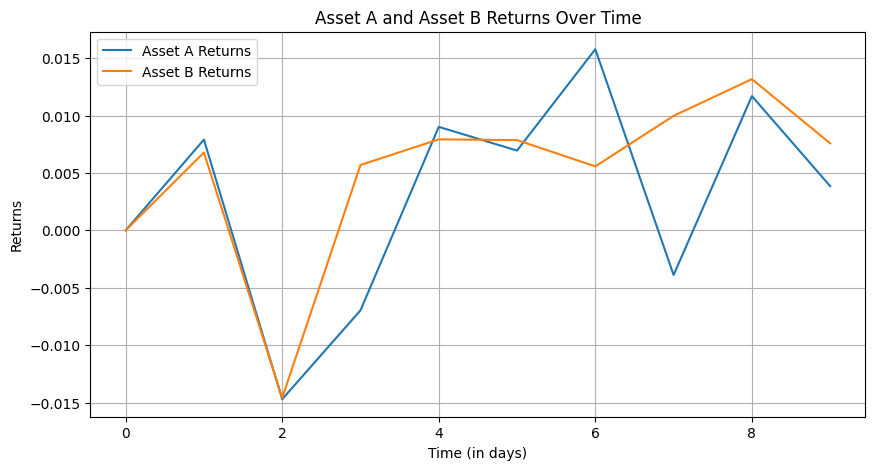

In [103]:
AssetA_Returns, AssetB_Returns = df['AssetA_Returns'], df['AssetB_Returns']
returns_df = pd.DataFrame({'Asset A Returns': AssetA_Returns, 'Asset B Returns': AssetB_Returns})

plt.figure(figsize = (10, 5))
returns_df.plot(ax=plt.gca())
plt.title('Asset A and Asset B Returns Over Time')
plt.xlabel('Time (in days)')
plt.ylabel('Returns')
plt.grid(True)
plt.legend()
plt.show()


In [130]:
AssetA_3_day_rolling_vol = AssetA_Returns.rolling(window = 3).std().fillna(0.0)
AssetB_3_day_rolling_vol = AssetB_Returns.rolling(window = 3).std().fillna(0.0)

rolling_vol_df = [AssetA_3_day_rolling_vol, AssetB_3_day_rolling_vol]
rolling_vol_df = pd.DataFrame(rolling_vol_df).transpose()
rolling_vol_df

threshold_A = df['AssetA_Volume'].quantile(0.8)
high_volume_days_A = df[df['AssetA_Volume'] > threshold_A]
high_volume_days_A

,Date,AssetA_Price,AssetA_Volume,AssetB_Price,AssetB_Volume,Rate_USDGBP,AssetA_Returns,AssetB_Returns
2,2024-01-04,100.5,150200,87.8,110000,1.269,-0.014706,-0.014590
3,2024-01-05,99.8,160000,88.3,108500,1.271,-0.006965,0.005695
